In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_excel('D:/Data Science/Assignment/18Forecasting/CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
final_list = []
quarter = list(data["Quarter"])
for qtr in quarter :
    if qtr[0:2] == "Q1":
        qtr = "03"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q2":
        qtr = "06"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q3":
        qtr = "09"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q4":
        qtr = "12"+qtr[2:]
        final_list.append(qtr)
data["Quarters"] = final_list

In [5]:
data.head()

,Quarter,Sales,Quarters
0,Q1_86,1734.827000,03_86
1,Q2_86,2244.960999,06_86
2,Q3_86,2533.804993,09_86
3,Q4_86,2154.962997,12_86
4,Q1_87,1547.818996,03_87


In [6]:
data.isnull().sum()

Quarter     0
Sales       0
Quarters    0
dtype: int64

In [7]:
data["Quarters"] = pd.to_datetime(data["Quarters"], format="%m_%y")

In [8]:
data.head()

,Quarter,Sales,Quarters
0,Q1_86,1734.827000,1986-03-01
1,Q2_86,2244.960999,1986-06-01
2,Q3_86,2533.804993,1986-09-01
3,Q4_86,2154.962997,1986-12-01
4,Q1_87,1547.818996,1987-03-01


In [9]:
data = data.drop("Quarter", axis=1)

In [10]:
data.head()

,Sales,Quarters
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01


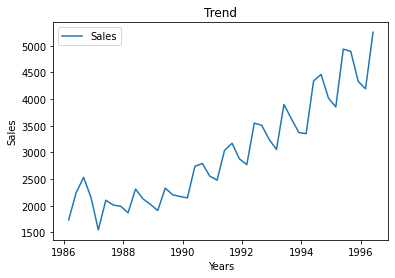

In [13]:
fig = plt.subplots()
plt.plot(data["Quarters"], data["Sales"], label="Sales")
plt.title("Trend")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.legend()

Text(0.5, 1.0, 'Quarterlly Distribution of Sales')

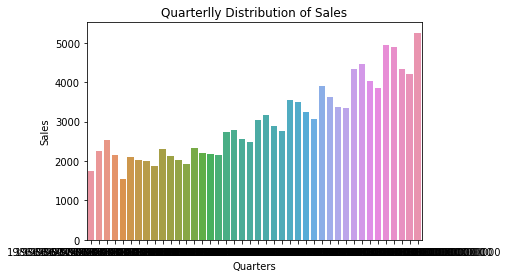

In [15]:
#Distribution of Sales
fig = plt.subplots()
sns.barplot(x=data["Quarters"], y=data["Sales"])
plt.title("Quarterlly Distribution of Sales")

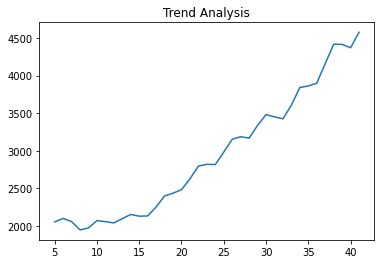

In [16]:
#trending
data["Sales"].rolling(6).mean().plot()
plt.title("Trend Analysis")
plt.show()

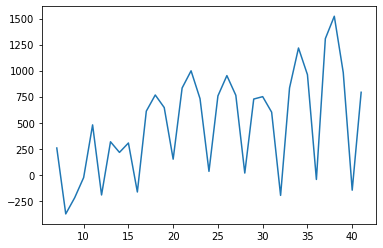

In [17]:
data["Sales"].diff(periods=7).plot()
plt.show()

In [18]:
data["month"] = data.Quarters.dt.strftime("%b")

In [19]:
data.head()

,Sales,Quarters,month
0,1734.827000,1986-03-01,Mar
1,2244.960999,1986-06-01,Jun
2,2533.804993,1986-09-01,Sep
3,2154.962997,1986-12-01,Dec
4,1547.818996,1987-03-01,Mar


<AxesSubplot:xlabel='month', ylabel='Sales'>

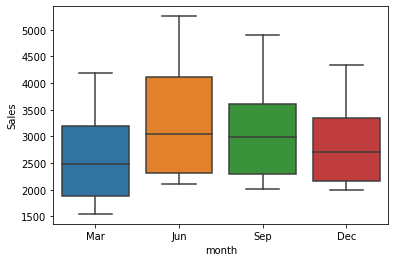

In [20]:
#Quarter distribution of sales
sns.boxplot(x="month",y="Sales",data=data)

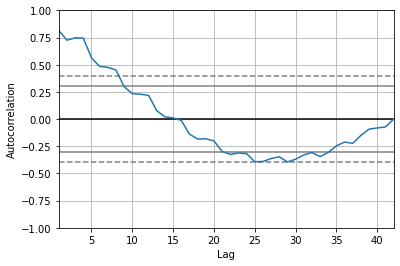

In [21]:
#autocorelation
pd.plotting.autocorrelation_plot(data['Sales'])
plt.show()

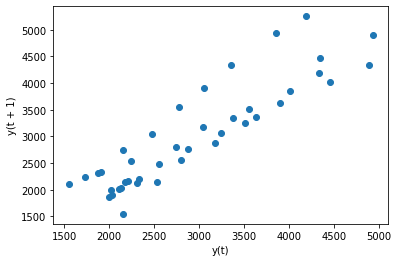

In [22]:
#LAG Plot
pd.plotting.lag_plot(data['Sales'])
plt.show()

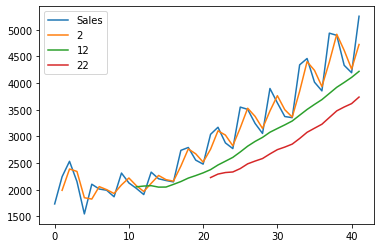

In [24]:
plt.figure()
data.Sales.plot(label="Sales")
for i in range(2,24,10):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model = ARIMA(data.Sales, order=(1,1,1))
model_fit = model.fit(disp=0)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -300.368
Method:                       css-mle   S.D. of innovations            364.467
Date:                Thu, 08 Jul 2021   AIC                            608.737
Time:                        23:00:36   BIC                            615.591
Sample:                             1   HQIC                           611.233
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.8696     16.223      4.430      0.000      40.074     103.665
ar.L1.D.Sales     0.1461      0.204      0.717      0.473      -0.253       0.545
ma.L1.D.Sales    -0.7786      0.117     -6.683      0.000      -1.007      -0.550
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.8456           +0.0000j            6.8456            0.0000
MA.1            1.2844           +0.0000j            1.2844            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
residuals = pd.DataFrame(model_fit.resid)

In [30]:
rmse = np.mean((residuals)**2)**.5
print("rmse  :", rmse)

rmse  : 0    368.273275
dtype: float64


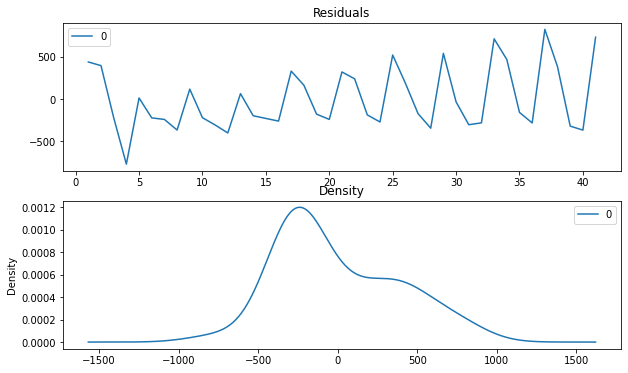

In [34]:
#residual plot and desity of residual
fig, ax = plt.subplots(2,1,figsize=(10,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

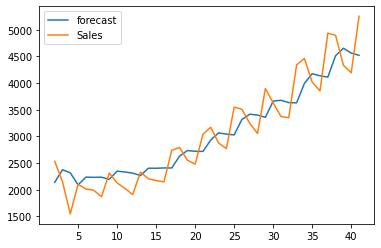

In [32]:
#prediction
model_fit.plot_predict()
plt.show()

In [35]:
#split data
train = data.Sales[0:32]
test = data.Sales[32:]

In [36]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [37]:
#forecast
forecast, se, conf = fitted.forecast(10, alpha=0.05)

In [38]:
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

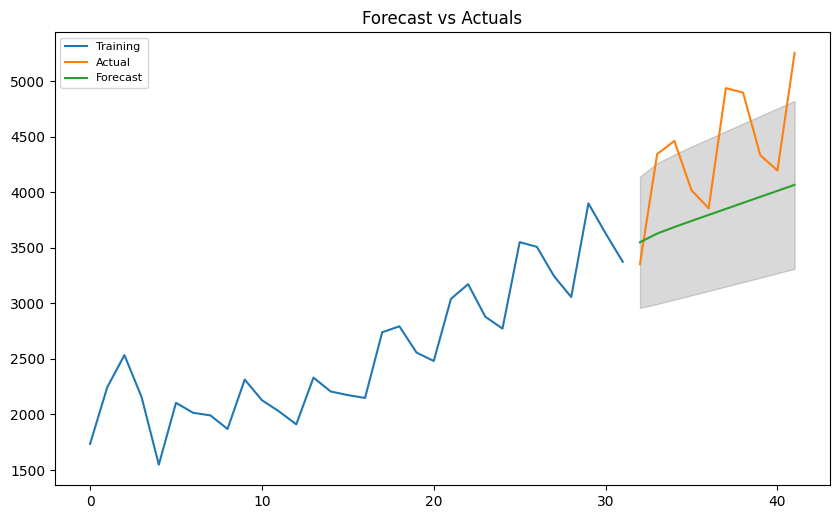

In [40]:
#forecast VS Actual
plt.figure(figsize=(10,6), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [41]:
from statsmodels.tsa.stattools import acf

In [42]:
#RMSE and ACF
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  
    acf1 = acf(forecast-test)                     
    return({ 'rmse':rmse, 'acf1':acf1})

In [43]:
forecast_accuracy(forecast, test.values)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'rmse': 705.5888908402294,
 'acf1': array([ 1.        , -0.14290054, -0.52513859,  0.14662983,  0.56077738,
        -0.28894832, -0.30713228,  0.10567396,  0.18853179, -0.23749323])}

In [44]:
import statsmodels.api as sm

In [45]:
mod = sm.tsa.SARIMAX(data["Sales"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -200.215
Date:                              Thu, 08 Jul 2021   AIC                            406.429
Time:                                      23:05:39   BIC                            410.531
Sample:                                           0   HQIC                           407.714
                                               - 42                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8619     22.804      0.038      0.970     -43.833      45.557
ma.S.L12      -0.89

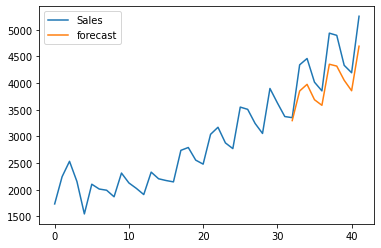

In [47]:
data['forecast'] = results.predict(start = 32, end=41 , dynamic= True)  
data[['Sales', 'forecast']].plot()
plt.show()

In [48]:
sarima_rmse = np.mean((results.resid)**2)**0.5
print("SARIMA model rmse :", sarima_rmse)

SARIMA model rmse : 412.3149724231188


 After calculating rmse for different models we can conclude that ARIMA model with dispersion=0 and performing on whole.
 Sales value gives us lesser rmse is good model compare to model with -1 dispersion and applying on training data.
 and rmse from SARIMA model gives higher rmse compare to ARIMA.

### Therefore SARIMA model is good model compare to other